In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am lokesh and i like to play cricket")

AIMessage(content="\n<think>\nOkay, the user introduced himself as Lokesh and mentioned he likes to play cricket. I should respond in a friendly and engaging way. Let me start by welcoming him and acknowledging his interest in cricket. Maybe ask him some questions to keep the conversation going. I can ask about his favorite cricket positions or players. Also, since he's talking about playing, maybe he's part of a team or plays regularly. I should make sure to express enthusiasm and show that I'm interested in his hobbies. Let me check if my questions are open-ended so he can elaborate. Maybe mention some popular cricket topics to connect with him better. Avoid making it too long, keep it conversational. Alright, let me put that together.\n\nWait, I should also keep the response in English as per the user's message. Make sure to use proper grammar but keep it casual. Maybe add an emoji to keep it friendly. Okay, that should work.\n</think>\n\nHey Lokesh! That's awesome—cricket is such a

In [5]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

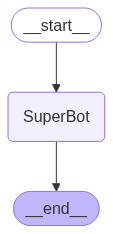

In [6]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Lokesh And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Lokesh And I like cricket', additional_kwargs={}, response_metadata={}, id='a898fb6d-d0a1-4f03-9994-97b17c4dd4f8'),
  AIMessage(content="\n<think>\nOkay, so the user is Lokesh and he mentioned he likes cricket. Let me think about how to respond.\n\nFirst, I should greet him back and acknowledge his name. Then, since he's a cricket fan, maybe ask about his favorite team or player to get the conversation going. That way, he can share more details if he wants. Also, I should make sure the tone is friendly and approachable. Maybe mention some current cricket events or tournaments if relevant. Wait, but I should check if there's a tournament happening now. Let me recall... the T20 World Cup is in the past, but maybe the IPL season? Depending on the time of year, maybe the Indian Premier League is ongoing or just finished. Alternatively, maybe the Test series between countries. Hmm, but since the user hasn't provided a time frame, maybe keep 

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

In [8]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Lokesh And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="\n<think>\nOkay, the user introduced themselves as Lokesh and mentioned they like cricket. I should respond in a friendly way. Let me start by greeting them back and acknowledging their name and interest.\n\nHmm, maybe ask them a question about cricket to keep the conversation going. Like, do they follow a particular team or player? That could be a good opener. Oh, also, I should make sure to keep the tone positive and welcoming. Let me check for any typos or errors. Alright, that should work.\n\n</think>\n\nHello Lokesh! Nice to meet you. That's a great interest—cricket is such a thrilling sport! Do you follow any particular team or player? Let me know—I’m curious to hear more about what excites you about the game! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 157, 'prompt_tokens': 21, 'total_tokens': 178, 'completion_time': 0.384832398, 'prompt_time': 0.004496796, 'queue_time': 0.33795907399999997, 'tot

In [9]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Lokesh And I like cricket', additional_kwargs={}, response_metadata={}, id='74f276fc-6351-4caf-bc8a-39074f04d2ad'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Lokesh and mentioned they like cricket. I should respond in a friendly way. Let me start by greeting them back and acknowledging their name and interest.\n\nHmm, maybe ask them a question about cricket to keep the conversation going. Like, do they follow a particular team or player? That could be a good opener. Oh, also, I should make sure to keep the tone positive and welcoming. Let me check for any typos or errors. Alright, that should work.\n\n</think>\n\nHello Lokesh! Nice to meet you. That's a great interest—cricket is such a thrilling sport! Do you follow any particular team or player? Let me know—I’m curious to hear more about what excites you about the game! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 157, 'p

In [10]:
for chunk in graph_builder.stream({'messages':"I also like football "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='\n<think>\nOkay, the user mentioned they like both cricket and football. I should acknowledge both sports again. Let me see, they might be a big sports fan. Maybe they want to talk about their favorite teams or players? Wait, in the previous response, I asked about favorite teams or memorable matches. The user just repeated "I also like football" again. Hmm, maybe they\'re trying to add more info but didn\'t get a chance. Or perhaps they want to emphasize their interest in football now.\n\nI should keep the conversation going. Let\'s ask more specific questions about football. Maybe their favorite league, team, or player. Also, check if they play any of these sports. It\'s good to show enthusiasm and keep the flow. Let them share more details. Maybe mention a popular league like the Premier League or La Liga to prompt a response. Also, since they mentioned cricket first, maybe compare or contrast the two sports? But keep it light and friend

In [11]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Lokesh And I like cricket', additional_kwargs={}, response_metadata={}, id='74f276fc-6351-4caf-bc8a-39074f04d2ad'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Lokesh and mentioned they like cricket. I should respond in a friendly way. Let me start by greeting them back and acknowledging their name and interest.\n\nHmm, maybe ask them a question about cricket to keep the conversation going. Like, do they follow a particular team or player? That could be a good opener. Oh, also, I should make sure to keep the tone positive and welcoming. Let me check for any typos or errors. Alright, that should work.\n\n</think>\n\nHello Lokesh! Nice to meet you. That's a great interest—cricket is such a thrilling sport! Do you follow any particular team or player? Let me know—I’m curious to hear more about what excites you about the game! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 157, 'p

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [13]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Lokesh and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Lokesh and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'b0ce5b1f-a618-4502-be12-cb382ee9d33b', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is Lokesh And I like cricket', additional_kwargs={}, response_metadata={}, id='74f276fc-6351-4caf-bc8a-39074f04d2ad'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Lokesh and mentioned they like cricket. I should respond in a friendly way. Let me start by greeting them back and acknowledging their name and interest.\n\nHmm, maybe ask them a question about cricket to keep the conversation going. Like, do they follow a particular team or player? That could be a good opener. Oh, also, I should make sure to keep the tone positive and welcoming. Let me check for any typos or errors. Alright, that should work.\n\n</think>\n\nHello Lo